In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['zomato.csv', 'file5.json', 'file1.json', 'file2.json', 'file4.json', 'file3.json', 'Country-Code.xlsx']


Подключите необходимые библиотеки.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)}); # you can change this if needed

Загрузите данные. Они находятся в директории input.

In [3]:
df = pd.read_csv('../input/zomato.csv', encoding = "ISO-8859-1")
#df.info()
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


В каких странах расположены рестораны? Назовите топ-5 стран. Выведите аналогичную статистику по городам.

In [4]:
countries = pd.read_excel('../input/Country-Code.xlsx')
df = df.merge(countries, left_on = 'Country Code', right_on = 'Country Code')
print(df['Country'].value_counts()[:5])
print(df['City'].value_counts()[:5])

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
Name: Country, dtype: int64
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64


Какие типы кухни подают в ресторанах? Как связан этот признак с рейтингом? Не забывайте о визуализации информации.

In [5]:
# Your code
 #df.groupby('Aggregate rating')['Cuisines'].value_counts()

#df.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count().sort_values('Restaurant ID', ascending=False).head(10)

a = []
for i in df["Cuisines"].values:
    #print(i, type(i))
    if (type(i) == str):
        for j in i:
            a.extend(i.split(", "))
print(np.unique(a))

 #sns.heatmap(pd.crosstab(df['Cuisines'], df['Aggregate rating']))

['Afghani' 'African' 'American' 'Andhra' 'Arabian' 'Argentine' 'Armenian'
 'Asian' 'Asian Fusion' 'Assamese' 'Australian' 'Awadhi' 'BBQ' 'Bakery'
 'Bar Food' 'Belgian' 'Bengali' 'Beverages' 'Bihari' 'Biryani' 'Brazilian'
 'Breakfast' 'British' 'Bubble Tea' 'Burger' 'Burmese' 'Bí_rek' 'Cafe'
 'Cajun' 'Canadian' 'Cantonese' 'Caribbean' 'Charcoal Grill' 'Chettinad'
 'Chinese' 'Coffee and Tea' 'Contemporary' 'Continental' 'Cuban'
 'Cuisine Varies' 'Curry' 'Deli' 'Desserts' 'Dim Sum' 'Diner'
 'Drinks Only' 'Durban' 'Dí_ner' 'European' 'Fast Food' 'Filipino'
 'Finger Food' 'Fish and Chips' 'French' 'Fusion' 'German' 'Goan'
 'Gourmet Fast Food' 'Greek' 'Grill' 'Gujarati' 'Hawaiian' 'Healthy Food'
 'Hyderabadi' 'Ice Cream' 'Indian' 'Indonesian' 'International' 'Iranian'
 'Irish' 'Italian' 'Izgara' 'Japanese' 'Juices' 'Kashmiri' 'Kebab'
 'Kerala' 'Kiwi' 'Korean' 'Latin American' 'Lebanese' 'Lucknowi'
 'Maharashtrian' 'Malay' 'Malaysian' 'Malwani' 'Mangalorean'
 'Mediterranean' 'Mexican' 'Middle

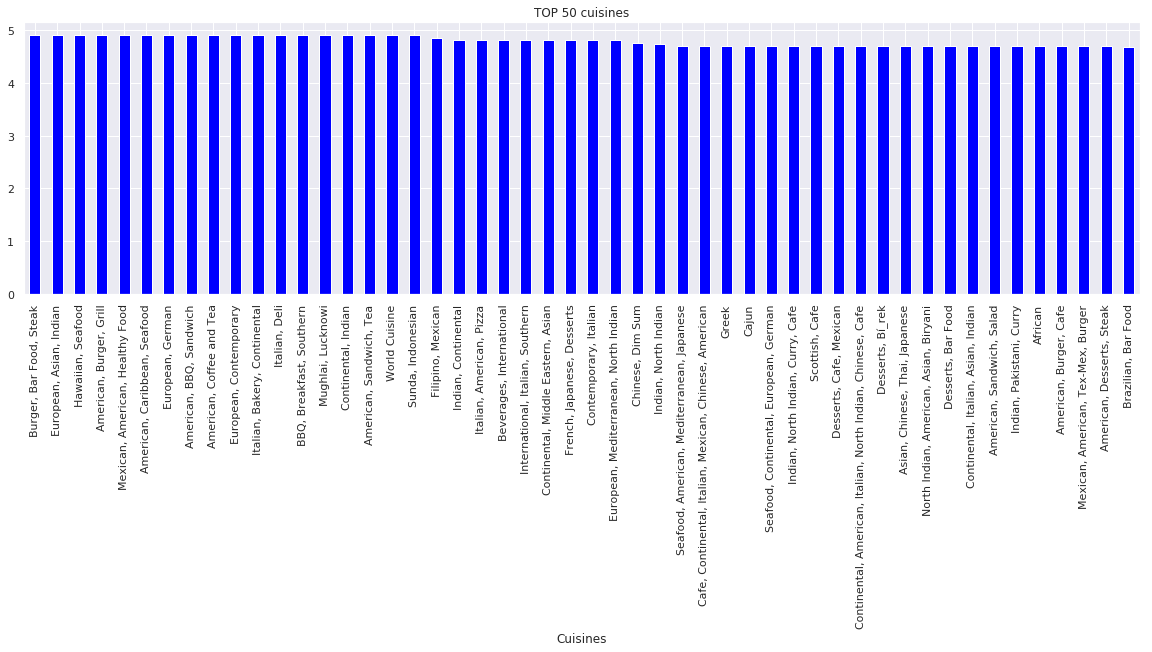

In [6]:
df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(50).plot(kind='bar', color = 'blue', figsize=(20,5), title='TOP 50 cuisines')

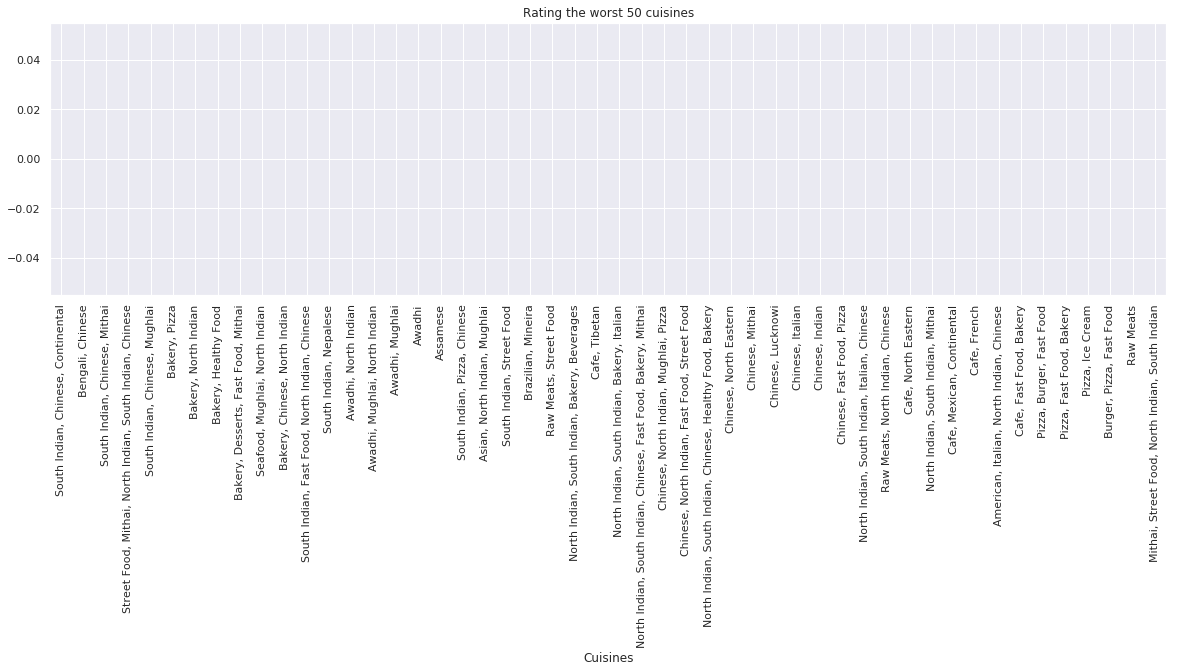

In [7]:
df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).tail(50).plot(kind='bar',figsize=(20,5), title='Rating the worst 50 cuisines')

Что можно сказать о связи ценового диапазона и рейтинга ресторана? Не забывайте о визуализации информации.

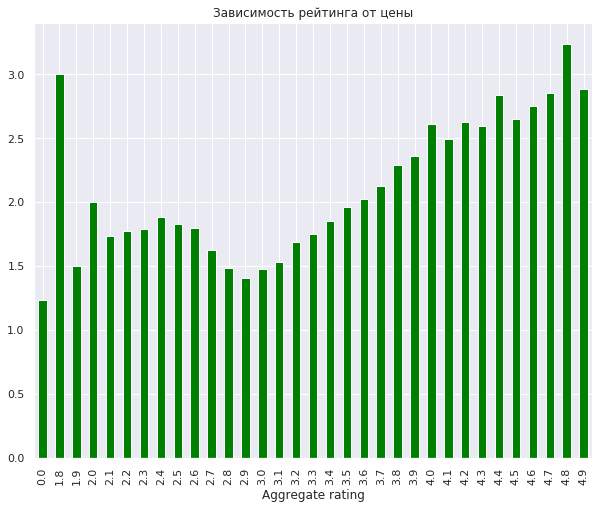

In [8]:

#plt.scatter(df[df['Average Cost for two']<10000]['Average Cost for two'], df[df['Average Cost for two']<10000]['Aggregate rating']);
# sns.jointplot(x='Aggregate rating', y='Average Cost for two', data=df);
# sns.boxplot(x = 'Aggregate rating', y='Average Cost for two', data=df)
#df[['Aggregate rating', 'Average Cost for two']].mean().sort_values(ascending=False
df.groupby('Aggregate rating')['Price range'].mean().plot(kind = 'bar', color = 'green', title = 'Зависимость рейтинга от цены')
# df.plot.scatter(x='Price range',y='Aggregate rating',figsize=(15,7), title="Зависимость рейтинга от цены")

In [9]:
from scipy.stats import pearsonr, spearmanr, kendalltau
spearmanr(df['Price range'], df['Aggregate rating'])

SpearmanrResult(correlation=0.49865739750372057, pvalue=0.0)

Есть ли различия в рейтинге ресторанов с возможностью бронирования столиков и без него? 

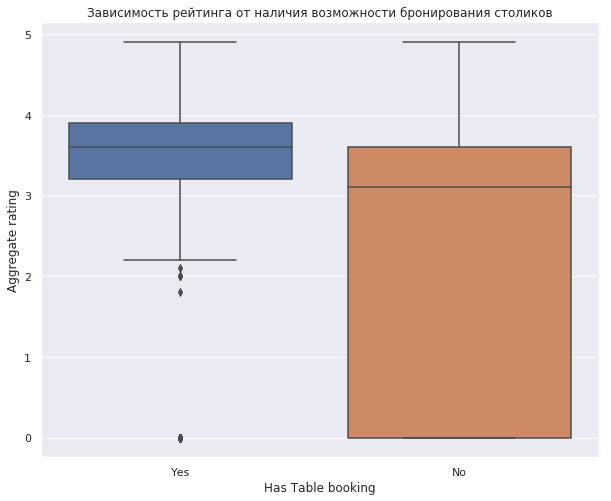

In [10]:
sns.boxplot(x = "Has Table booking", y = "Aggregate rating", data = df)
plt.title('Зависимость рейтинга от наличия возможности бронирования столиков')
plt.show()

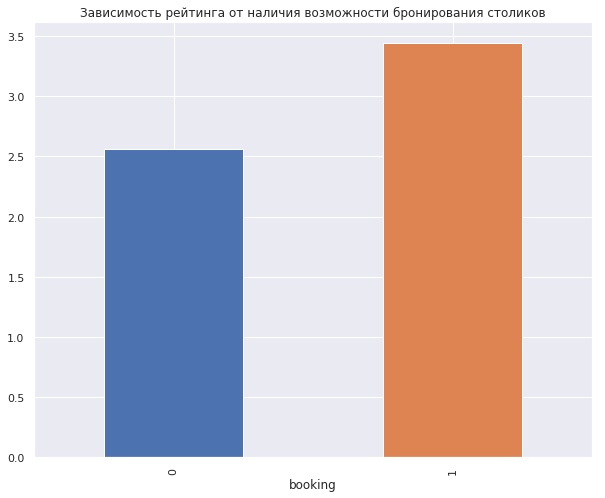

In [11]:
new_values = {'No':0, 'Yes':1}
df['booking'] = df['Has Table booking'].map(new_values)
df.groupby('booking')['Aggregate rating'].mean().plot(kind = 'bar', title = 'Зависимость рейтинга от наличия возможности бронирования столиков')

In [12]:
#Бисериальный коэффициент корреляции
from scipy.stats import pointbiserialr 
new_values = {'No':0, 'Yes':1}
df['booking'] = df['Has Table booking'].map(new_values)
pointbiserialr(df['Aggregate rating'], df['booking'])

PointbiserialrResult(correlation=0.18999765696209206, pvalue=2.4808519133558066e-78)

Визуализируйте признак **Rating color** (или **Rating text**) в комбинации с геолокацией (**Longitude**, **Latitude**). Какой вывод можно сделать?

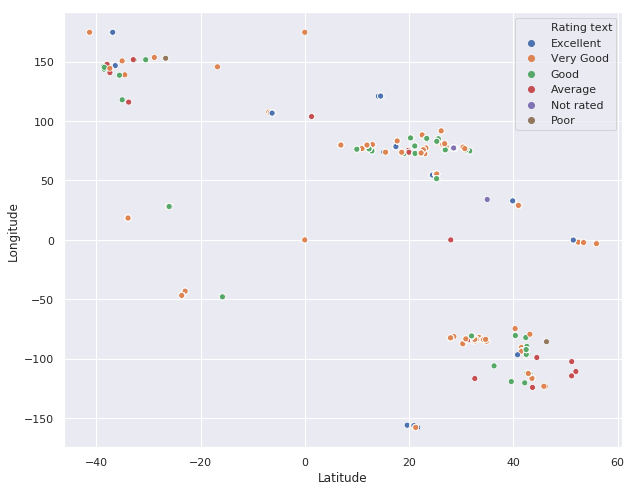

In [13]:
# Your code
#from scipy.stats import pointbiserialr
# new_values = { 'Excellent':6, 'Very Good':5, 'Good':4, 'Avg.':3, 'Poor':2, 'Not Rated':1}
# df['Rating text num'] = df['Rating text'].map(new_values)
#pointbiserialr(df['Longitude'],df['Rating text num'])
#df.groupby('Rating text num')['Latitude'].mean().plot(kind = 'bar')
sns.scatterplot(x = 'Latitude', y = 'Longitude', hue = 'Rating text', data=df)
#df.plot.scatter(x = 'Latitude', y = 'Longitude', c = 'Rating color', figsize=(15,7))


Какие ещё инсайты можно найти в имеющихся данных? Творческое задание.

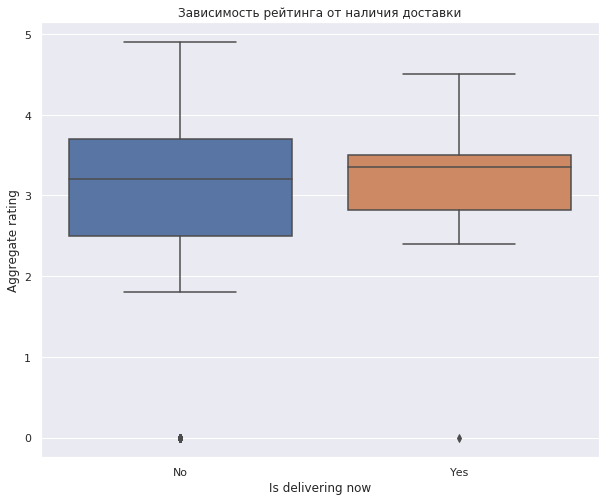

In [14]:
sns.boxplot(x = "Is delivering now", y = "Aggregate rating", data = df)
plt.title('Зависимость рейтинга от наличия доставки')
plt.show()

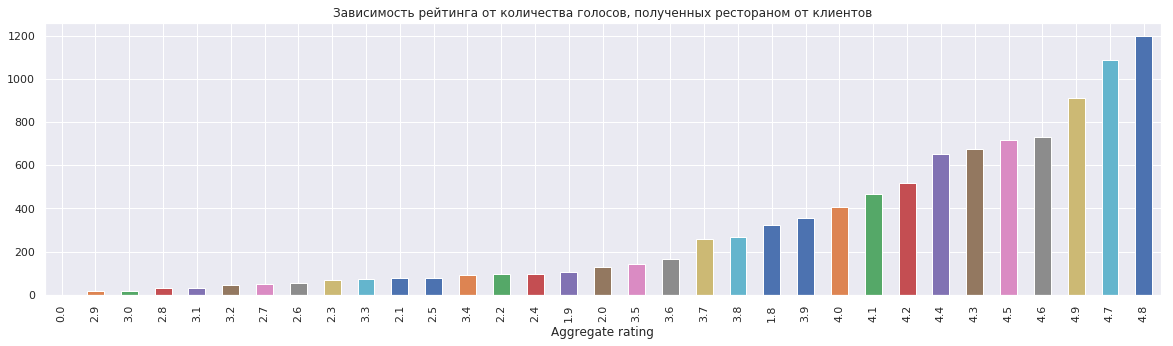

In [15]:
df.groupby('Aggregate rating')['Votes'].mean().sort_values().plot(kind='bar',figsize=(20,5), title='Зависимость рейтинга от количества голосов, полученных рестораном от клиентов')

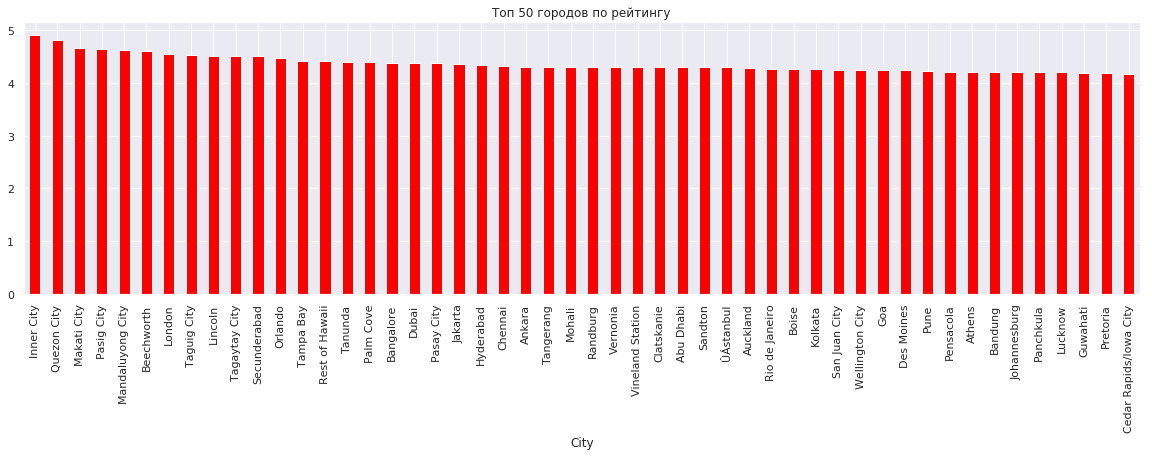

In [16]:
df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(50).plot(kind='bar', color = 'red', figsize=(20,5), title='Топ 50 городов по рейтингу')

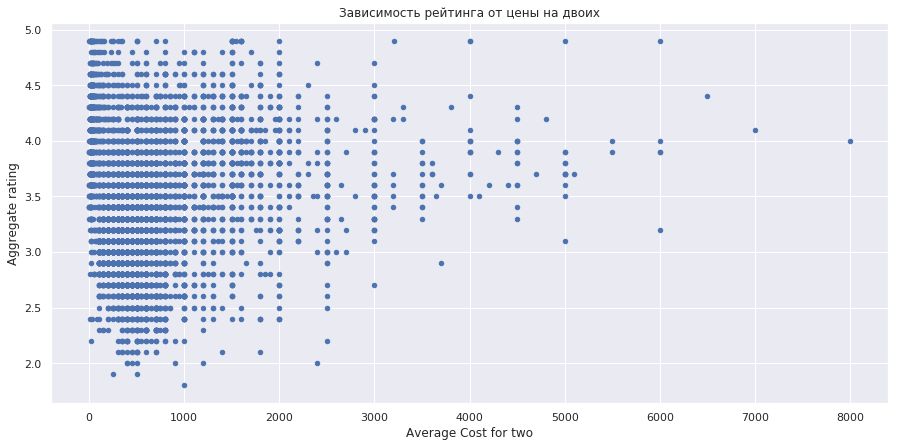

In [17]:
#df.groupby('Aggregate rating')['Average Cost for two'].mean().plot(kind = 'bar', title = 'Зависимость рейтинга от цены')
df[(df['Average Cost for two']<10000) & (df['Aggregate rating']!=0)].plot.scatter(x = 'Average Cost for two', y = 'Aggregate rating', figsize=(15,7), title="Зависимость рейтинга от цены на двоих")
#df.plot.scatter(x = 'Average Cost for two', y = 'Aggregate rating', figsize=(15,7), title="Зависимость рейтинга от цены на двоих")

In [18]:
df['Restaurant Name'].value_counts()

Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
Keventers                             34
Pizza Hut                             30
Giani                                 29
Baskin Robbins                        28
Barbeque Nation                       26
Giani's                               22
Dunkin' Donuts                        22
Barista                               22
Pind Balluchi                         20
Costa Coffee                          20
Sagar Ratna                           19
Pizza Hut Delivery                    19
Wah Ji Wah                            19
Twenty Four Seven                     19
Chaayos                               18
Starbucks                             18
Republic of Chicken                   18
KFC                                   18
Burger King                           16
Haldiram's      

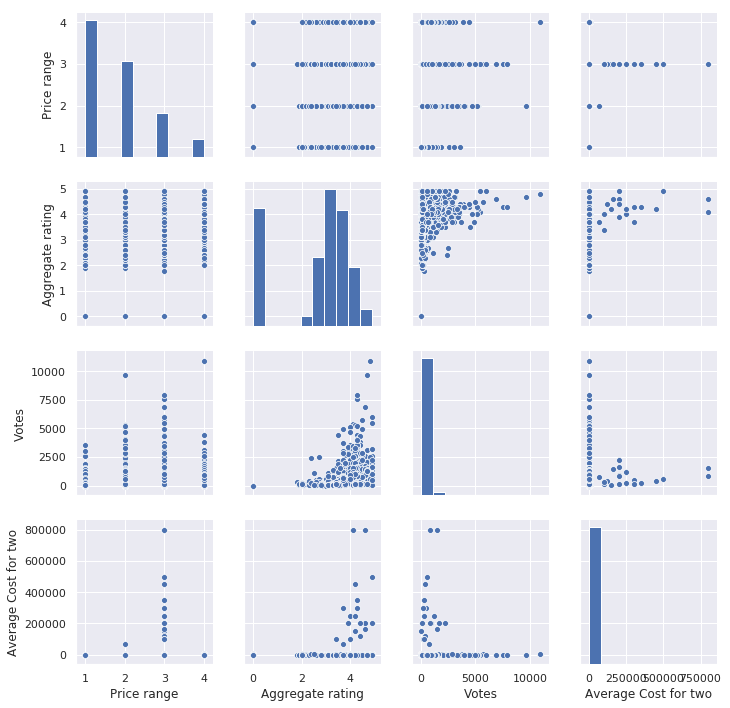

In [19]:
n = ['Price range', 'Aggregate rating', 'Votes', 'Average Cost for two']
sns.pairplot(df[n])